In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Titanic-Dataset.csv') # Importing the data set
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Missing values Heatmap')

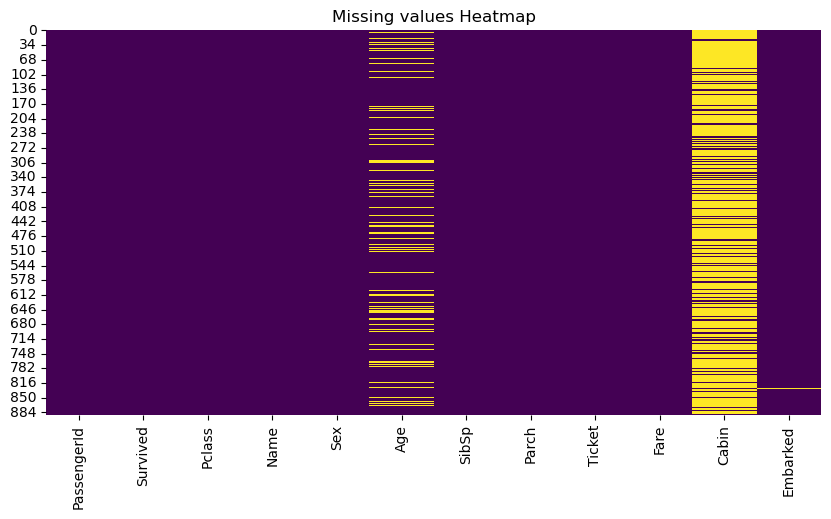

In [3]:
# Plotting the heatmap of the missing values
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')
plt.title('Missing values Heatmap')

In [4]:
# Filling the missing data
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [5]:
# Combining the Siblings/Spouses column and the Parents/Children column to form Family Size
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

In [6]:
# Creating the feature matrix and dependent variable vector
X = dataset.drop(['Name','PassengerId','Survived','Ticket','Cabin'],axis=1).values
y = dataset['Survived'].values

In [7]:
X

array([[3, 'male', 22.0, ..., 7.25, 'S', 1],
       [1, 'female', 38.0, ..., 71.2833, 'C', 1],
       [3, 'female', 26.0, ..., 7.925, 'S', 0],
       ...,
       [3, 'female', 28.0, ..., 23.45, 'S', 3],
       [1, 'male', 26.0, ..., 30.0, 'C', 0],
       [3, 'male', 32.0, ..., 7.75, 'Q', 0]], dtype=object)

In [8]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [9]:
# Encoding the Embarked and Sex column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
ct = ColumnTransformer(transformers=[('encoders',OneHotEncoder(),[-2])],remainder='passthrough')
X[:,1] = le.fit_transform(X[:,1])


In [10]:
X = ct.fit_transform(X)

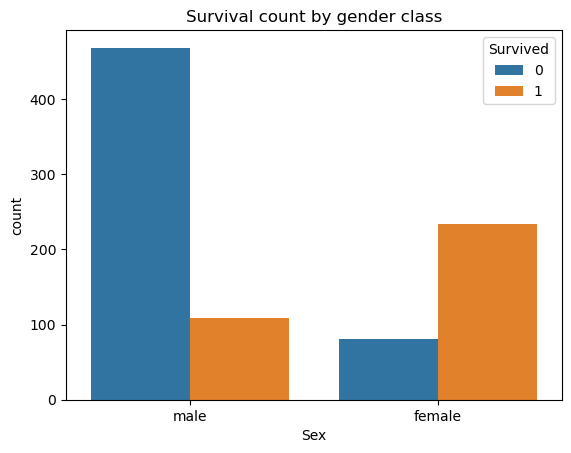

In [11]:
#Visualising the survivors by gender
sns.countplot(data=dataset,x='Sex',hue='Survived')
plt.title('Survival count by gender class')
plt.show()

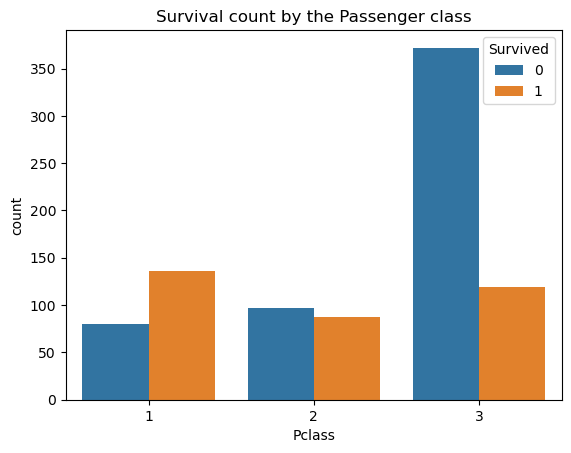

In [12]:
# Visualising survivors by the Passenger class
sns.countplot(data=dataset,x='Pclass',hue='Survived')
plt.title('Survival count by the Passenger class')
plt.show()

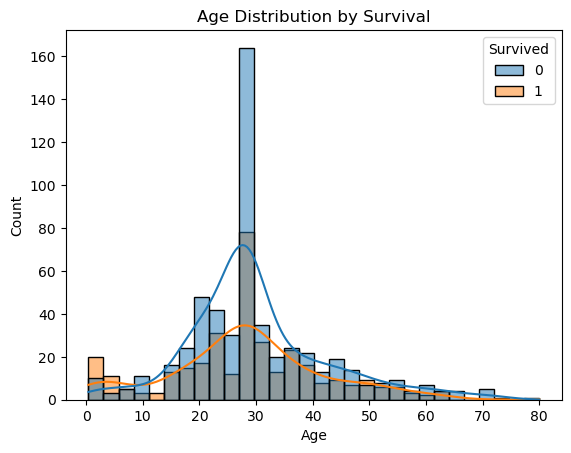

In [13]:
# Visualising survivors by the Age
sns.histplot(data=dataset, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

In [14]:
# Splitting the train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
# Training the Random Forest model on the train sets
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=51,random_state=0)
classifier.fit(X,y)

RandomForestClassifier(n_estimators=51, random_state=0)

In [21]:
#Measuring the accuracy of the model
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy score is : {accuracy:.4f}')

The accuracy score is : 0.9777


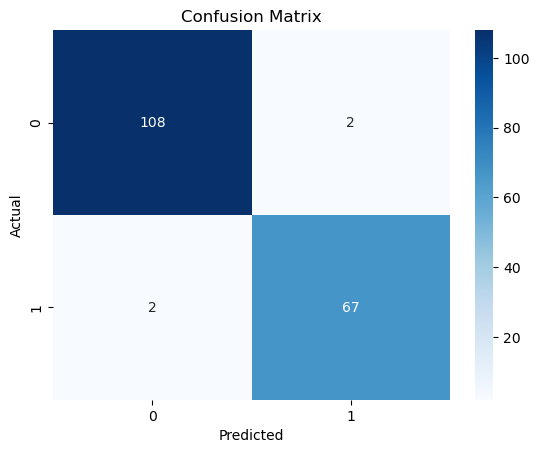

In [22]:
# Displaying the confusion matrix and it's heatmap
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=5)
print(f"Cross-validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation Accuracy: 0.8115 ± 0.0130


In [24]:
train_preds = classifier.predict(X_train)
test_preds = classifier.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9803
Testing Accuracy: 0.9777
